# Introduction to Astropy

Author: Kazi Abu Rousan

## Astropy

**Astropy** is a community-driven Python package containing many tools and functions that are useful for doing astronomy and astrophysics, from observation planning, data reduction and data analysis to modelling and numerical calculations.

To install it run `pip install astropy`

Astropy has many features. But let's start with the simplest ones.

### Constants and Unit Convertion

The most important thing to do before start learning Astronomy, we have to learn about basic things. Like what are the unit used and values of different useful constants.

Astronomical quantities are often given in a variety of non-SI units. Besides the strange negative-logarithmic flux units of magnitudes (originating in Ancient Greece), for historical reasons, astronomers often work with cm and g instead of m and kg. There are also a wide range of units for expressing important astrophysical quantities in more ‘manageable’ amounts, such as the parsec (pc) or Astronomical Unit (AU) for distance, the solar mass unit ($M_⊙$) or useful composite units, such as the solar luminosity ($L_⊙$). Calculations using different units, or converting between units, can be made much easier using Astropy’s units sub-package.

In [1]:
from astropy import constants as const #import the constants submodule of astropy
print(const.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [2]:
print(const.M_sun)

  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018


In [3]:
print(const.M_earth)

  Name   = Earth mass
  Value  = 5.972167867791379e+24
  Uncertainty  = 1.3422009501651213e+20
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018


In [4]:
print(const.R_earth)

  Name   = Nominal Earth equatorial radius
  Value  = 6378100.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3


Let's try and find earth's semi-major axis using this constants and Kepler's Law. Let me remind you guys what is Kepler's 3rd Law.
$$ T^2 = \frac{4\pi^2}{G(M+m)}a^3$$
where a is the semi-major axis length, M is the mass of the star, m is the mass of the planet and T is the time period. Using this,

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
1*u.s

<Quantity 1. s>

In [6]:
from astropy import units as u # To make units correct. Just wait we will learn this
def semi_major_calc(T,M,m):
    return np.cbrt((T**2*const.G*(m+M))/(4*np.pi))

In [9]:
T = 365*24*3600*u.s#Convert time period into sec
m = const.M_earth
M = const.M_sun
semi_major_calc(T,M,m)

<Quantity 2.18997301e+11 m>

After using constants, we have to learn how to use proper units to get the answers with correct units. Also, if we learn using astropy for calculating units, then we don't have to calculate things like **how many sec are there in 1 year** by ourselves. (We are so lazy)

In [10]:
# from astropy import units as u# To access the unit tools
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [11]:
print(const.c.to('km/s'))#converts speed of light from m/s to km/s

299792.458 km / s


In [12]:
const.c.cgs #WE can also directly access values in cgs unit

<Quantity 2.99792458e+10 cm / s>

In [13]:
print(const.h)

  Name   = Planck constant
  Value  = 6.62607015e-34
  Uncertainty  = 0.0
  Unit  = J s
  Reference = CODATA 2018


In [14]:
print(const.h.to('MeV'))#If conversion is not possible then it will show error

UnitConversionError: 'J s' (action/angular momentum) and 'MeV' (energy/torque/work) are not convertible

In [15]:
#Lets find rest-mass energy of electron
#My teacher is going to beat me for using rest-mass
E_0 = const.m_e*const.c**2#electron's mass
print(E_0)
E_0.to('MeV')

8.187105776823886e-14 m2 kg / s2


<Quantity 0.51099895 MeV>

If we have some scalar, we can add units to it

In [16]:
a = 2
print(a)
print(a*(u.m/u.s))#make it 2m/s -- velocity

2
2.0 m / s


### Astronomical Positions

After learning units and values, we have to know positions or else forget about doing calculations. This can also be done using Astropy.

The coordinate commonly used are ICRS (Right ascension [RA], Declination [Dec]). A diagram is given below to remind you guys what they means.

[![Alt text](https://useruploads.socratic.org/a9leQTIXQW69VgzHjSc9_Ra_and_dec_on_celestial_sphere.png)](coordinate)

Let's try to see how we can get the position of **Betelgeuse**.

Betelgeuse is a red supergiant star of spectral type M1-2 and one of the largest visible to the naked eye. It is usually the tenth-brightest star in the night sky and, after Rigel, the second-brightest in the constellation of Orion. It is a distinctly reddish, semiregular variable star whose apparent magnitude, varying between +0.0 and +1.6, has the widest range displayed by any first-magnitude star. At near-infrared wavelengths, Betelgeuse is the brightest star in the night sky. Its Bayer designation is α Orionis, Latinised to Alpha Orionis and abbreviated Alpha Ori or α Ori.

In [17]:
from astropy.coordinates import SkyCoord, EarthLocation#skycoord is used to use celestrial coordinates.
betelgeuse = SkyCoord.from_name('Betelgeuse')
print(betelgeuse)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.40706399)>


We can individuallty access the values.

In [18]:
dec_val = betelgeuse.dec
print(dec_val)# gives values in degrees, arc-min, arc-sec

7d24m25.430382s


In [19]:
test_coord = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
print(test_coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


We can also create our own coordinate values.

In [20]:
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
print(c)
c = SkyCoord('00h42.5m', '+41d12m')
print(c)
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
print(c)
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
print(c)#WE can use different ways to create the same thing

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


In [21]:
#using this on numpy arrays
c = SkyCoord(ra=[10, 11, 12, 13]*u.degree, dec=[41, -5, 42, 0]*u.degree)
c

<SkyCoord (ICRS): (ra, dec) in deg
    [(10., 41.), (11., -5.), (12., 42.), (13.,  0.)]>

Let's see what we can do using the things we just saw:

In [23]:
# Assuming distance is 548 light years (Betelgeuse approximate distance)
distance = 548 * u.lightyear
betelgeuse_with_distance = SkyCoord(ra=betelgeuse.ra, dec=betelgeuse.dec, distance=distance)
betelgeuse_cartesian = betelgeuse_with_distance.cartesian
betelgeuse_cartesian

<CartesianRepresentation (x, y, z) in lyr
    (11.44763433, 543.30650185, 70.64698657)>

In [24]:
x = betelgeuse_cartesian.x.value
y = betelgeuse_cartesian.y.value
z = betelgeuse_cartesian.z.value

In [25]:
from mpl_toolkits.mplot3d import Axes3D

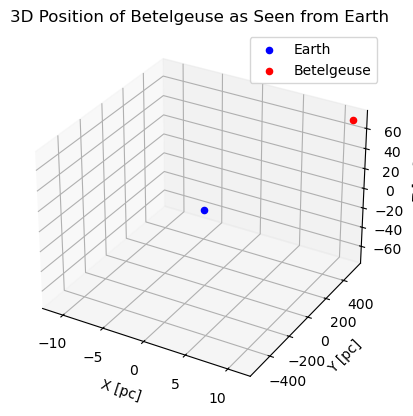

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([0], [0], [0], color='blue', label='Earth')
ax.scatter([x], [y], [z], color='red', label='Betelgeuse')
ax.set_xlabel('X [pc]')
ax.set_ylabel('Y [pc]')
ax.set_zlabel('Z [pc]')
ax.set_title('3D Position of Betelgeuse as Seen from Earth')
ax.view_init(elev=30, azim=-60) 
ax.set_xlim([-x * 1.1, x * 1.1])
ax.set_ylim([-y * 1.1, y * 1.1])
ax.set_zlim([-z * 1.1, z * 1.1])
ax.legend()
plt.show()

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

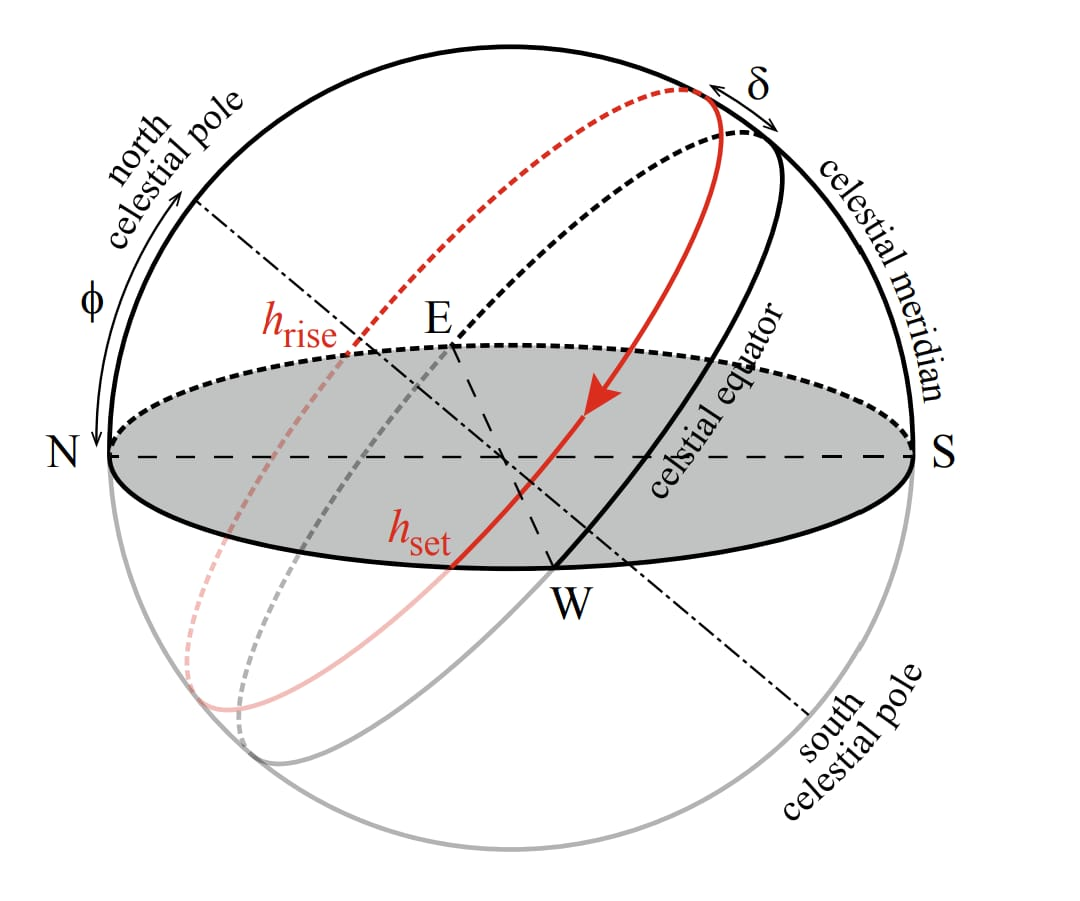

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

In [31]:
HG = SkyCoord.from_name('Betelgeuse')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.40706399)>
7d24m25.430382s
22d29m28.3s


In [32]:
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.624647824614263
T =  12.41139513940102 h


### Using FITS

FITS means **Flexible Image Transport System**. It is a file format designed by astronomers. It can store images and tables (ASCII and Binary). A given file can have both - this allows one to attach tabular data directly to images (like catalog of photometry).

Let's see few examples.

In [33]:
from astropy.io import fits #to use fits files
h = fits.open('example_data.fits')

In [35]:
# This is a special type of list.
# Supports more or less all list operations.
# And some more (like writeto)
print(type(h))
h

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [36]:
# HDUList contains HDU objects.
print(type(h[0]))
print(h.info())

<class 'astropy.io.fits.hdu.image.PrimaryHDU'>
Filename: example_data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (512, 512)   int16   
None


So, this simple file contains just one HDU which has 71 entries in its header (cards) and data which has dimensions $512 x 512$.

Let's now see how the header of a given HDU can be examined. For convenience, we will create a variable pointing to it.

In [40]:
header = h[0].header
print(header.cards)

('SIMPLE', True, 'Fits standard')
('BITPIX', 16, 'Bits per pixel')
('NAXIS', 2, 'Number of axes')
('NAXIS1', 512, 'Axis length')
('NAXIS2', 512, 'Axis length')
('EXTEND', False, 'File may contain extensions')
('ORIGIN', 'NOAO-IRAF FITS Image Kernel July 2003', 'FITS file originator')
('DATE', '2017-02-17T04:36:31', 'Date FITS file was generated')
('IRAF-TLM', '2017-02-17T04:36:31', 'Time of last modification')
('OBJECT', 'm51  B  600s', 'Name of the object observed')
('IRAF-MAX', 19936.0, 'DATA MAX')
('IRAF-MIN', -1.0, 'DATA MIN')
('CCDPICNO', 53, 'ORIGINAL CCD PICTURE NUMBER')
('ITIME', 600, 'REQUESTED INTEGRATION TIME (SECS)')
('TTIME', 600, 'TOTAL ELAPSED TIME (SECS)')
('OTIME', 600, 'ACTUAL INTEGRATION TIME (SECS)')
('DATA-TYP', 'OBJECT (0)', 'OBJECT,DARK,BIAS,ETC.')
('DATE-OBS', '05/04/87', 'DATE DD/MM/YY')
('RA', '13:29:24.00', 'RIGHT ASCENSION')
('DEC', '47:15:34.00', 'DECLINATION')
('EPOCH', 0.0, 'EPOCH OF RA AND DEC')
('ZD', '22:14:00.00', 'ZENITH DISTANCE')
('UT', ' 9:27:27.0

In [41]:
data = h[0].data
print(type(data))#Access data

<class 'numpy.ndarray'>


/tmp/ipykernel_56182/4081833434.py:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(data))


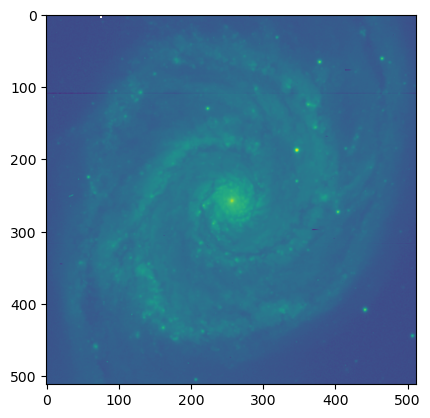

In [42]:
import matplotlib.pyplot as plt
plt.imshow(np.log(data))
plt.show()

Astropy has some feature to make it more nice and prominent.

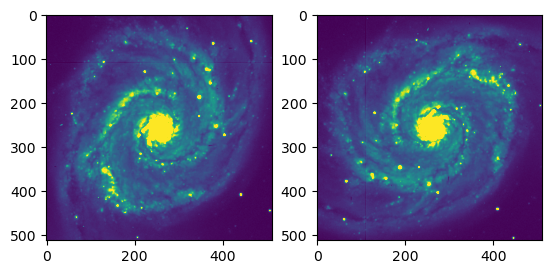

In [43]:
from astropy.visualization import ZScaleInterval
z = ZScaleInterval()
z1, z2 = z.get_limits(data)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(data, vmin=z1, vmax=z2)
axes[1].imshow(data.T, vmin=z1, vmax=z2)
plt.show()

This are just few things, I have shown. There are many things we can do using Astropy.

For more check this references.

1. Introduction to Scientific Computing in Python by Robert Johansson
2. Numerical Python in Astronomy and Astrophysics by W.Schmidt and M.Volschow
3. For Numpy  : https://numpy.org/learn/
4. For Scipy  : https://docs.scipy.org/doc/scipy/tutorial/index.html
5. For Astropy: https://docs.astropy.org/en/stable/index.html#getting-started

Hope you all enjoyed

### Accessing Data from  Archieve

In [44]:
from astroquery.gaia import Gaia
from astropy.table import Table

In [45]:
tables = Gaia.load_tables(only_names = True)
for table in tables:
    if 'gaiadr3' in table.get_qualified_name():
        print(table.get_qualified_name())

query = """SELECT source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag FROM gaiadr3.gaia_source WHERE parallax > 50"""
job = Gaia.launch_job_async(query)
gtable = job.get_results()

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
gaiadr3.gaiadr3.gaia_source
gaiadr3.gaiadr3.gaia_source_lite
gaiadr3.gaiadr3.astrophysical_parameters
gaiadr3.gaiadr3.astrophysical_parameters_supp
gaiadr3.gaiadr3.oa_neuron_information
gaiadr3.gaiadr3.oa_neuron_xp_spectra
gaiadr3.gaiadr3.total_galactic_extinction_map
gaiadr3.gaiadr3.total_galactic_extinction_map_opt
gaiadr3.gaiadr3.commanded_scan_law
gaiadr3.gaiadr3.allwise_best_neighbour
gaiadr3.gaiadr3.allwise_neighbourhood
gaiadr3.gaiadr3.apassdr9_best_neighbour
gaiadr3.gaiadr3.apassdr9_join
gaiadr3.gaiadr3.apassdr9_neighbourhood
gaiadr3.gaiadr3.dr2_neighbourhood
gaiadr3.gaiadr3.gsc23_best_neighbour
gaiadr3.gaiadr3.gsc23_join
gaiadr3.gaiadr3.gsc23_neighbourhood
gaiadr3.gaiadr3.hipparcos2_best_neighbour
gaiadr3.gaiadr3.hipparcos2_neighbourhood
gaiadr3.gaiadr3.panstarrs1_best_neighbour
gaiadr3.gaiadr3.panstarrs1_join
gaiadr3.gaiadr3.pansta

In [46]:
gtable

SOURCE_ID,ra,dec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,deg,deg,mas,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32
458018340407727104,37.87447894404984,57.37870558540406,50.00541479563848,12.018761,13.508623,10.820139
2673992663636347520,327.8635523883638,-1.4538921085791252,50.0364884312193,14.842792,17.169096,13.465856
1573896198753650944,181.4021839662666,56.394863843666194,50.03910614418915,14.254209,16.423683,12.901253
4124980981624504064,265.06231458409354,-15.665588234845977,50.040350976791295,20.670315,--,--
1454104436971779328,210.83875857040357,30.13201679858173,50.045835157385035,17.029284,20.339481,15.48455
18986817760556416,39.82435828918509,7.470816071340625,50.051067130892186,12.859632,14.509055,11.624809
1884744525522874880,342.8523234476119,29.662959272690284,50.051821712590645,15.341885,15.680044,14.820234
1089400763661597440,113.37909878073626,64.15647613415042,50.06421573579301,16.000692,16.438784,15.398046


In [48]:
gtable['ra']

37.87447894404984
327.8635523883638
181.4021839662666
265.06231458409354
210.83875857040357
39.82435828918509
342.8523234476119
113.37909878073626
169.2751391986689
182.87538613424064
176.87525389708776


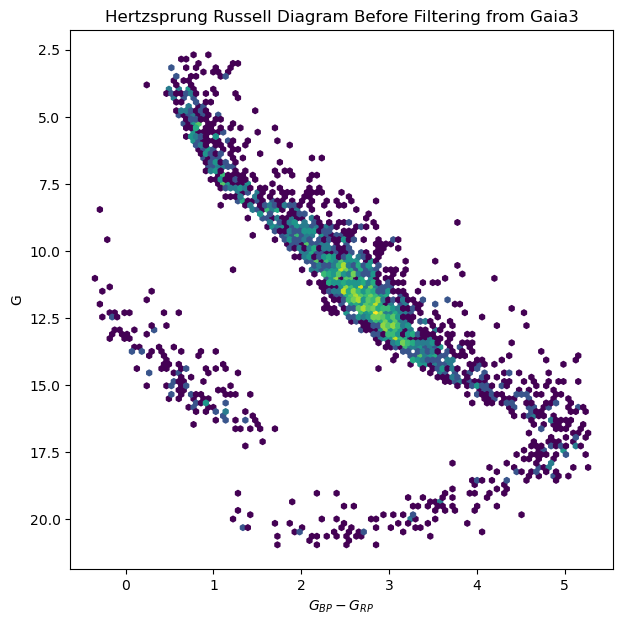

In [49]:
bp_rp = gtable['phot_bp_mean_mag'] - gtable['phot_rp_mean_mag']
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.hexbin(bp_rp, gtable['phot_g_mean_mag'],bins='log', mincnt=1)
ax.set_xlabel(r"$G_{BP} - G_{RP}$")
ax.set_ylabel(r"G")
ax.set_title("Hertzsprung Russell Diagram Before Filtering from Gaia3")
ax.invert_yaxis()
plt.savefig("gaia_HR.png")
plt.show()

### Spectrum Analysis

In [50]:
from PIL import Image as PILImage
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower'  # we want to show images, not matrices, so we set the origin to the lower-left
pl.matplotlib.style.use('dark_background')  # Optional configuration: if run, this will look nice on dark background notebooks
from astropy import units as u
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from IPython.display import Image
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist

In [51]:
hg_filename = "hg_lamp_1-sixteenth_s.bmp"
kr_filename = "kr_lamp_p6.bmp"
ne_filename = "ne_lamp_1s.bmp"

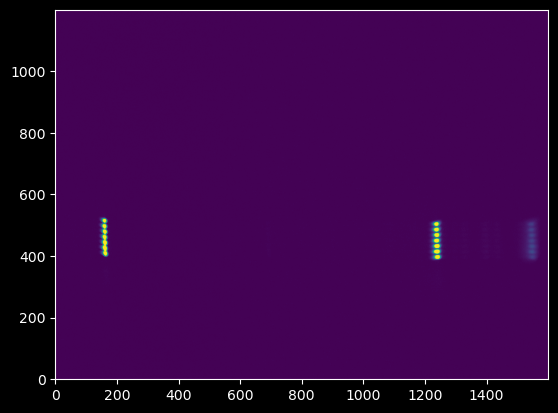

In [52]:
hg_image = np.array(PILImage.open(hg_filename))
kr_image = np.array(PILImage.open(kr_filename))
ne_image = np.array(PILImage.open(ne_filename))
pl.imshow(hg_image);

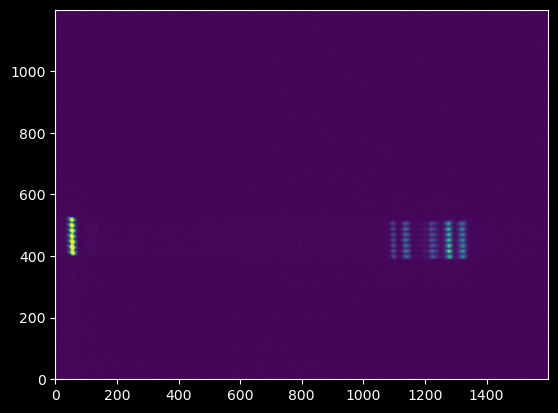

In [53]:
pl.imshow(kr_image);

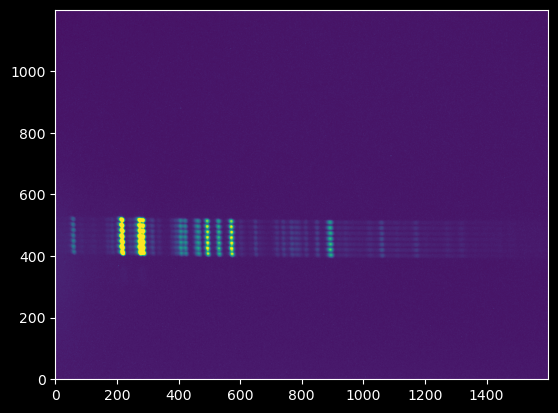

In [54]:
pl.imshow(ne_image);

In [55]:
trace_model = Polynomial1D(degree=3, c0=453.6307, c1=-0.01596396, c2=0.0000008259, c3=3.3348554642250357e-09)
trace_profile_model = Gaussian1D(amplitude=123.84846797, mean=0.17719819, stddev=5.10872134)
xaxis = np.arange(hg_image.shape[1])
trace_center = trace_model(xaxis)
npixels_to_cut=15
yaxis = np.arange(-npixels_to_cut, npixels_to_cut)
model_trace_profile = trace_profile_model(yaxis)

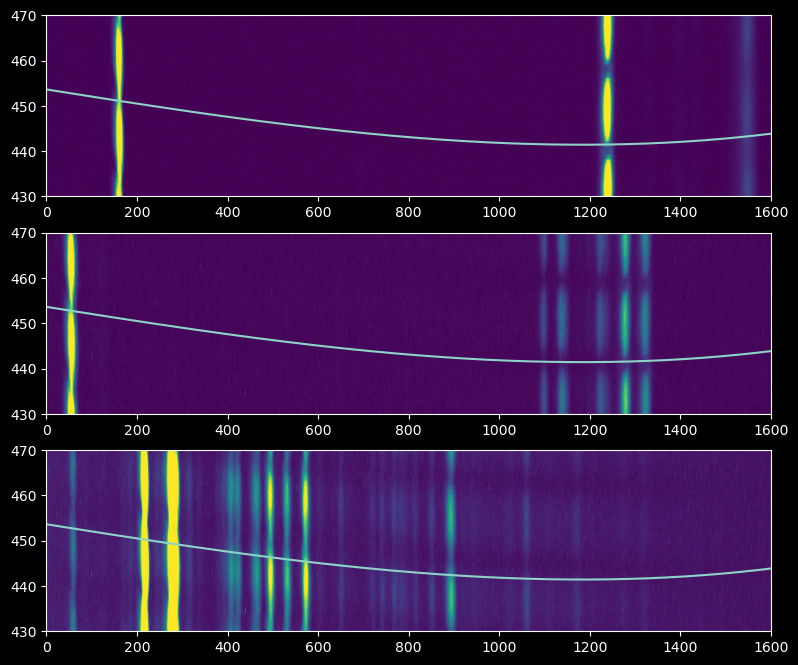

In [56]:
pl.figure(figsize=(16,8))
ax1 = pl.subplot(3,1,1)
ax1.imshow(hg_image[430:470,:], extent=[0,1600,430,470])
ax1.plot(xaxis, trace_center)
ax1.set_aspect(10)
ax2 = pl.subplot(3,1,2)
ax2.imshow(kr_image[430:470,:], extent=[0,1600,430,470])
ax2.plot(xaxis, trace_center)
ax2.set_aspect(10)
ax3 = pl.subplot(3,1,3)
ax3.imshow(ne_image[430:470,:], extent=[0,1600,430,470])
ax3.plot(xaxis, trace_center)
ax3.set_aspect(10)

In [57]:
hg_spectrum = np.array([np.average(hg_image[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
                                weights=model_trace_profile)
                     for yval, ii in zip(trace_center, xaxis)])
ne_spectrum = np.array([np.average(ne_image[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
                                weights=model_trace_profile)
                     for yval, ii in zip(trace_center, xaxis)])
kr_spectrum = np.array([np.average(kr_image[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii],
                                weights=model_trace_profile)
                     for yval, ii in zip(trace_center, xaxis)])

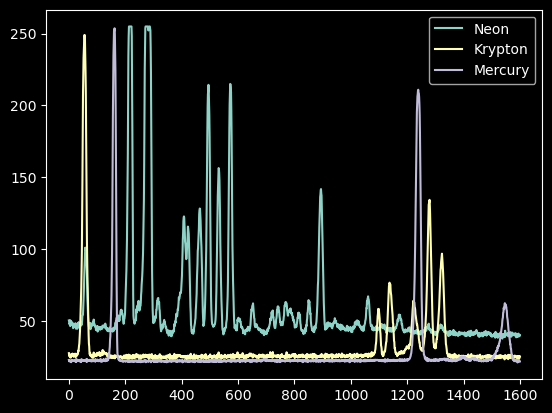

In [58]:
pl.plot(xaxis, ne_spectrum, label='Neon')
pl.plot(xaxis, kr_spectrum, label='Krypton')
pl.plot(xaxis, hg_spectrum, label='Mercury')
pl.legend(loc='best');

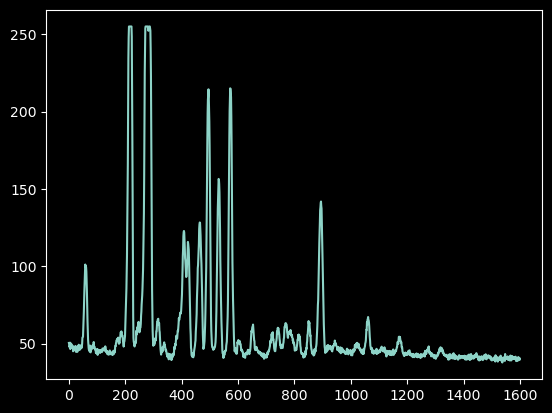

In [59]:
pl.plot(xaxis, ne_spectrum, label='Neon')

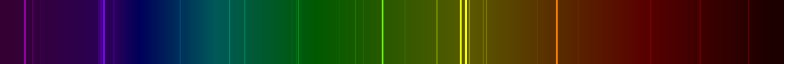

In [60]:
Image("https://upload.wikimedia.org/wikipedia/commons/2/29/Mercury_Spectra.jpg")

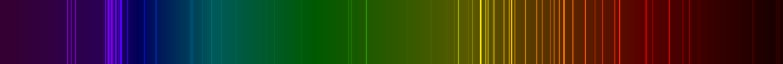

In [61]:
Image("https://upload.wikimedia.org/wikipedia/commons/9/99/Neon_spectra.jpg")

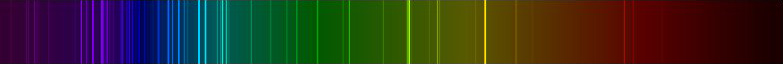

In [62]:
Image("https://upload.wikimedia.org/wikipedia/commons/a/a6/Krypton_Spectrum.jpg")

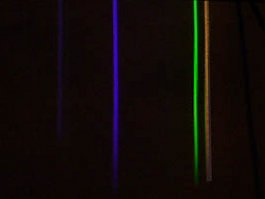

In [63]:
Image("https://upload.wikimedia.org/wikipedia/commons/0/0d/HG-Spektrum_crop.jpg")

The optical lines of Mercury are, from Wikipedia, in Angstroms:
1. 4047 violet
2. 4358 blue
3. 5461 green
4. 5782 yellow-orange
5. 6500 red

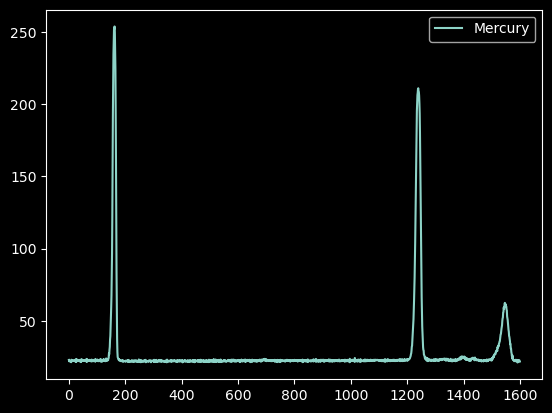

In [64]:
pl.plot(xaxis, hg_spectrum, label='Mercury')
pl.legend(loc='best');

In [65]:
guessed_wavelengths = [546.1, 435.8, 404.7]
guessed_xvals = [165, 1230, 1550]

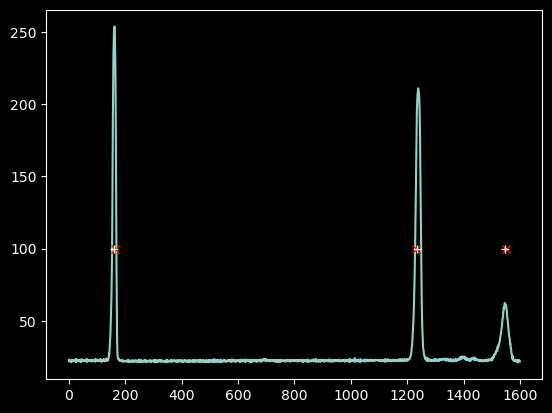

In [66]:
npixels = 15
improved_xval_guesses = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=hg_spectrum[g-npixels:g+npixels] - np.median(hg_spectrum))
                         for g in guessed_xvals]
improved_xval_guesses
[160.73664714718697, 1235.1743737214103, 1548.2834755459146]
pl.plot(xaxis, hg_spectrum)
pl.plot(guessed_xvals, [100]*3, 'x',color="red")
pl.plot(improved_xval_guesses, [100]*3, '+');

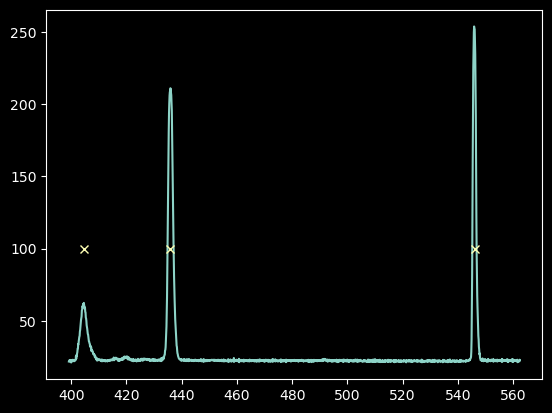

In [67]:
linfitter = LinearLSQFitter()
wlmodel = Linear1D()
linfit_wlmodel = linfitter(model=wlmodel, x=improved_xval_guesses, y=guessed_wavelengths)
wavelengths = linfit_wlmodel(xaxis) * u.nm
pl.plot(wavelengths, hg_spectrum)
pl.plot(guessed_wavelengths, [100]*3, 'x');

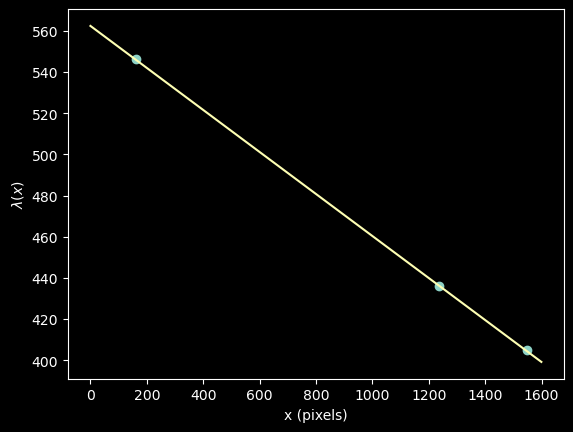

In [68]:
pl.plot(improved_xval_guesses, guessed_wavelengths, 'o')
pl.plot(xaxis, wavelengths, '-')
pl.ylabel(r"$\lambda(x)$")
pl.xlabel(r"x (pixels)")
plt.show()

Let's see actual data loaded in  NIST, the National Institute of Standards and Technology, maintains atomic line lists

In [69]:
minwave = wavelengths.min()
maxwave = wavelengths.max()
mercury_lines = Nist.query(minwav=minwave,maxwav=maxwave,linename='Hg I')
krypton_lines = Nist.query(minwav=minwave,maxwav=maxwave,linename='Kr I')
neon_lines = Nist.query(minwav=minwave,maxwav=maxwave,linename='Ne I')

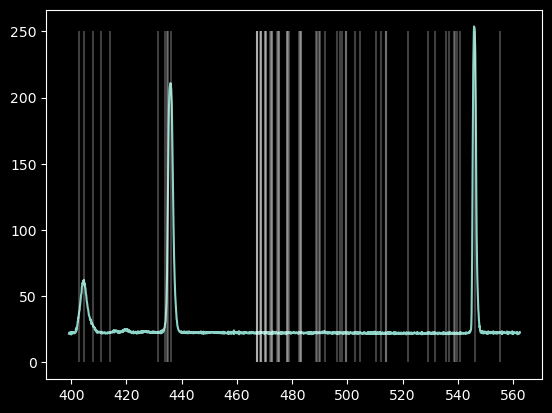

In [70]:
pl.plot(wavelengths, hg_spectrum)
pl.vlines(mercury_lines['Observed'], 0, 250, 'w', alpha=0.25);

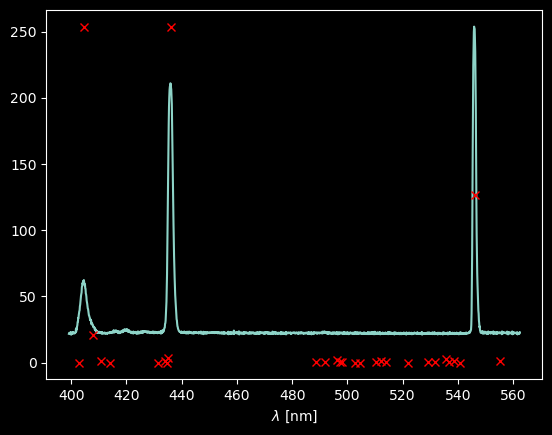

In [71]:
hg_keep = (~mercury_lines['Rel.'].mask) & (mercury_lines['Rel.'] != "*")
hg_wl_tbl = mercury_lines['Observed'][hg_keep]
hg_rel_tbl = np.array([float(x) for x in mercury_lines['Rel.'][hg_keep]])
pl.plot(wavelengths, hg_spectrum)
pl.plot(hg_wl_tbl, hg_rel_tbl / hg_rel_tbl.max() * hg_spectrum.max(), 'x', color="red")
pl.xlabel(r"$\lambda$ [nm]");

### Cosmology

In [73]:
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import z_at_value

In [76]:
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3, Tcmb0=2.73*u.K)

In [77]:
cosmo

FlatLambdaCDM(name=None, H0=<Quantity 70. km / (Mpc s)>, Om0=0.3, Tcmb0=<Quantity 2.73 K>, Neff=3.04, m_nu=<Quantity [0., 0., 0.] eV>, Ob0=None)

In [78]:
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

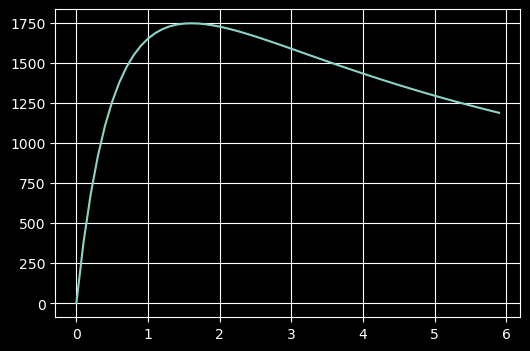

In [79]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
plt.grid()
plt.show()

In [80]:
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

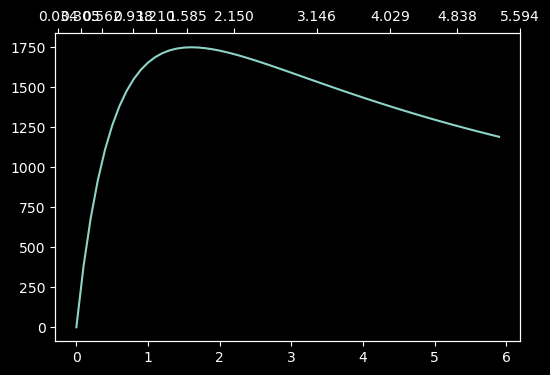

In [81]:
ageticks = [z_at_value(cosmo.age, age) for age in ages]
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
plt.show()

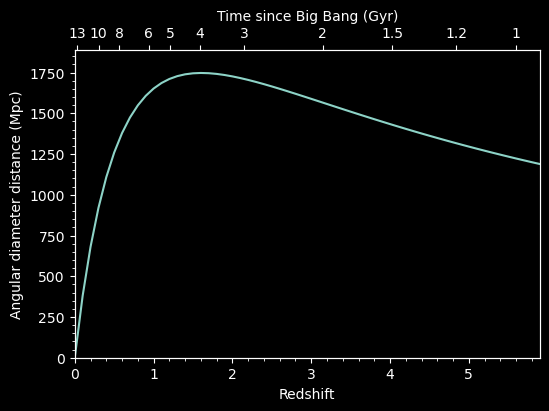

In [82]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()
plt.show()

In [83]:
from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)
dist2

<Quantity [   0.        ,  392.67770243,  702.10322423,  947.21840145,
           1141.91299674, 1296.63649577, 1419.40418586, 1516.4547778 ,
           1592.69861935, 1652.03435153, 1697.5792479 , 1731.84061981,
           1756.84559033, 1774.24064204, 1785.36874981, 1791.32962263,
           1793.02706271, 1791.20640699, 1786.4842772 , 1779.37232807,
           1770.29628736, 1759.61128467, 1747.61424203, 1734.55392823,
           1720.63914828, 1706.04543811, 1690.92055684, 1675.389008  ,
           1659.55577373, 1643.50940891, 1627.32461275, 1611.06437254,
           1594.78175582, 1578.52141272, 1562.32083873, 1546.21143861,
           1530.21942514, 1514.36657984, 1498.67089849, 1483.14713982,
           1467.80729296, 1452.66097636, 1437.71577875, 1422.97755117,
           1408.45065737, 1394.13818885, 1380.04214972, 1366.16361597,
           1352.50287259, 1339.05953195, 1325.83263596, 1312.82074437,
           1300.02201105, 1287.43425005, 1275.05499262, 1262.88153667,
      

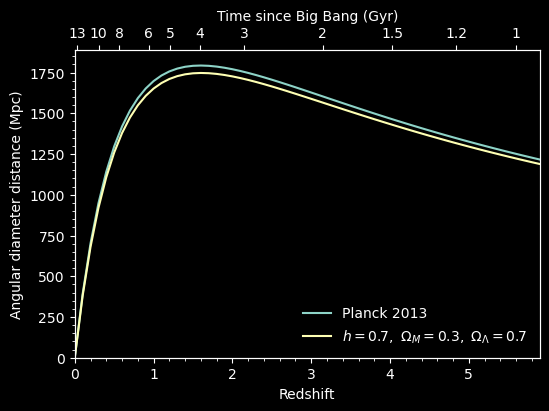

In [84]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label=
        r'$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.minorticks_on()
ax.set_ylim(0, 1890)
plt.show()

In [86]:
from astropy.cosmology import WMAP9 as cosmo
z = np.linspace(0, 5, 100)
luminosity_distance = cosmo.luminosity_distance(z).to(u.Mpc)

In [87]:
absolute_magnitude = -19.3
apparent_magnitude = absolute_magnitude + 5 * (np.log10(luminosity_distance.value) + 1)

/tmp/ipykernel_56182/2631753589.py:2: RuntimeWarning: divide by zero encountered in log10
  apparent_magnitude = absolute_magnitude + 5 * (np.log10(luminosity_distance.value) + 1)


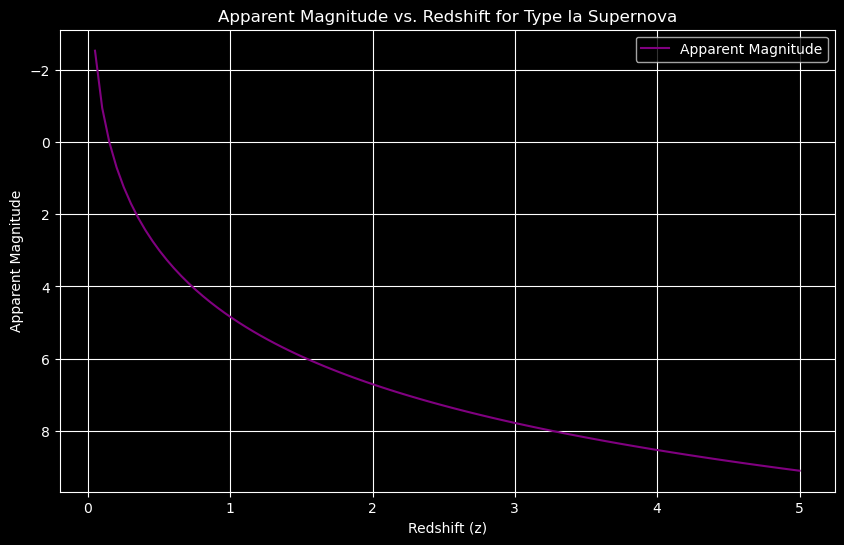

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(z, apparent_magnitude, label='Apparent Magnitude', color='purple')
plt.xlabel('Redshift (z)')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs. Redshift for Type Ia Supernova')
plt.gca().invert_yaxis()  # Invert y-axis for magnitude
plt.grid()
plt.legend()
plt.show()